In [185]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import collections
np.seterr('raise')
%matplotlib inline

## Оптимизация. Имплементация градиентного спуска

In [109]:
x = np.linspace(-1, 1, 5000)
def func1(_x): return _x**2
def grad1(_x): return 2*_x

In [41]:
def calculate_grad(func, x0, delta=0.01): return (func(x0+delta)-func(x0))/delta
def calculate_grad2(func, x0, delta=0.01): return (func(x0+delta)-func(x0-delta))/(2*delta)

In [42]:
x0=np.random.uniform(-50, 50)
print('true grad', grad1(x0))
print('method1', calculate_grad(func1, x0))
print('method2', calculate_grad2(func1, x0))

true grad -71.3359898489261
method1 -71.32598984892411
method2 -71.33598984891023


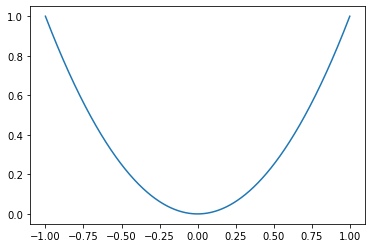

In [110]:
plt.plot(x, func1(x))
plt.show()

In [327]:
x0=np.random.uniform(-50, 50)
alpha=0.1
n_iter=100
for x in range(n_iter):
    print(x0, func1(x0))
    x0-=alpha*grad1(x0)

13.41293528436973 179.9068329426905
10.730348227495785 115.14037308332193
8.584278581996628 73.68983877332604
6.867422865597303 47.16149681492867
5.493938292477842 30.183357961554346
4.395150633982274 19.317349095394786
3.516120507185819 12.363103421052662
2.8128964057486554 7.912386189473704
2.2503171245989244 5.063927161263171
1.8002536996791396 3.24091338320843
1.4402029597433117 2.074184565253395
1.1521623677946493 1.3274781217621727
0.9217298942357195 0.8495859979277907
0.7373839153885756 0.543735038673786
0.5899071323108604 0.347990424751223
0.47192570584868837 0.22271387184078273
0.3775405646789507 0.14253687797810097
0.30203245174316057 0.09122360190598462
0.24162596139452847 0.05838310521983016
0.19330076911562277 0.0373651873406913
0.15464061529249823 0.023913719898042436
0.12371249223399858 0.015304780734747158
0.09896999378719887 0.009795059670238183
0.0791759950297591 0.0062688381889524376
0.06334079602380728 0.00401205644092956
0.050672636819045824 0.0025677161221949185
0

In [69]:
class optimizer:
    def __init__(self, alpha, n_iter):
        self.alpha=alpha
        self.n_iter=n_iter
    def fit(self, func, grad, x0):
        for i in range(self.n_iter):
            x0-=self.alpha*grad(x0)
        return x0
opt1=optimizer(alpha, 100)
x=opt1.fit(func1, grad1, np.random.uniform(-50, 50))
print(x, func1(x))

-1.0000013998946438 1.0000027997912473


<b>Домашнее задание: оптимизировать x^2*(np.sin(0,5*_x)^2+1)</b>
<ul>
<li>При каких значениях alpha оптимизация проходит успешно, а при каких "застревает"?</li></ul>

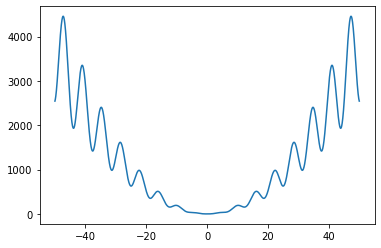

In [350]:
x = np.linspace(-50, 50, 5000)
def func2(_x): return (_x**2)*(np.sin(0.5*_x)**2+1)
def grad2(_x): return (_x**2) * (np.sin(0.5 * _x)) * (np.cos(0.5 * _x)) + 2 * _x * ((np.sin(0.5 * _x))**2 + 1)
plt.plot(x, func2(x))
plt.show()

In [483]:
x0=np.random.uniform(-50, 50)
alpha=0.0011
n_iter=100
for _ in range(n_iter):
    print(x0, func2(x0))
    x0-=alpha*grad2(x0)

17.158900497169 459.24451048096137
17.26079274352652 449.5787818113914
17.367328795285815 439.09631782443927
17.476949440751802 428.0954778463949
17.587766259569886 416.95879592409574
17.6976833189629 406.1090126096811
17.804568110135122 395.9501781981724
17.906442788693766 386.80952799048174
18.001656960193568 378.89700237602705
18.08900696442175 372.292568159642
18.16778294056233 366.96062635672064
18.237746061865444 362.7819556731392
18.299054757305843 359.5907614273834
18.352165263511328 357.20702322361404
18.397729224515192 355.4593182871215
18.4365035525705 354.19767989779837
18.469279715326298 353.2985291238056
18.496833524910258 352.664430190268
18.51989298880247 352.22108645985804
18.53912037136149 351.9132848277069
18.555104524902397 351.7008076230612
18.56836010522559 351.55481674796573
18.579331046862837 351.45488892379956
18.588396403860003 351.38670218623867
18.59587726670538 351.34029187040835
18.602043925328573 351.3087685255298
18.607122776967444 351.28739295863056
18.

In [454]:
first_x0=np.random.uniform(-50, 50)
alpha=np.arange(0.001, 2, 0.001)
n_iter=100
result = dict(min_x=99999999, min_y = 9999999999, alpha=None)
for a in alpha:
    x0=first_x0
    for i in range(n_iter):
        try:
            y0 = func2(x0)
            x0-=a*grad2(x0)
        except Exception as e:
            break
    else:
        if -0.1 < x0 < 0.1 and -0.1 < y0 < 0.1 and x0 < result['min_x'] and y0 < result['min_y']:
            
            for _ in range(100):
                try:
                    t = np.random.uniform(-50, 50)
                    z = func2(t)
                    grad2(t)
                except Exception as e:
                    break
            else:
                if -0.1 < t < 0.1 and -0.1 < z < 0.1 and t < result['min_x'] and z < result['min_y']:
                    result['min_x'] = x0
                    result['min_y'] = y0
                    result['alpha'] = a
            
print(result)

{'min_x': 2.5031739036359726e-05, 'min_y': 7.804876327370661e-10, 'alpha': 0.052000000000000005}


In [364]:
t = collections.deque([], 3)
t.append(1)
t.append(2)
t.append(3)
t.append(4)
t.append(5)
len(t), list(t) == sorted(t)

(3, True)

## Линейная регрессия

In [153]:
# Возьмем 2 признака и 1000 объектов
n_features = 2
n_objects = 1000

# сгенерируем вектор истинных весов
w_true = np.random.normal(size=(1, n_features ))

# сгенерируем матрицу X, вычислим Y с добавлением случайного шума
X = np.random.uniform(-7, 7, (n_objects, n_features))
Y = X.dot(w_true.T) + np.random.normal(0, 0.5, size=(n_objects, 1))

# возьмем нулевые начальные веса
w = np.zeros((1, n_features))

In [48]:
# реализуем функцию, определяющую среднеквадратичную ошибку
def mserror(X, w, y_real):
    y = X.dot(w.T)
    return np.sum((y - y_real)**2) / y_real.shape[0]

In [49]:
mserror(X, w_true, Y), mserror(X, w, Y)

(0.23932273522859224, 16.52342249104028)

In [50]:
def mserror_grad(X, w, y_real):
    return 2*(X.dot(w.T)-y_real).T.dot(X)/y_real.shape[0]

In [51]:
mserror_grad(X, w_true, Y)

array([[ 0.21899641, -0.13553363]])

In [52]:
mserror_grad(X, w, Y)

array([[31.74536119, 11.88931975]])

In [53]:
# список векторов весов после каждой итерации
w_list = [w.copy().flatten()]

# список значений ошибок после каждой итерации
errors = []

# шаг градиентного спуска
eta = 0.02

# максимальное число итераций
max_iter = 1e4

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

# зададим начальную разницу весов большим числом
weight_dist = np.inf

# счетчик итераций
iter_num = 0

# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    new_w = w -  eta * mserror_grad(X, w, Y)
    weight_dist = np.linalg.norm(new_w - w)
    
    w_list.append(new_w.copy().flatten())
    cur_error=mserror(X, new_w, Y)
    print('curent error: {0}'.format(cur_error))
    errors.append(mserror(X, new_w, Y))
    
    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)

curent error: 1.651725776438489
curent error: 0.3619256012258927
curent error: 0.2492405159238325
curent error: 0.2392925859451771
curent error: 0.23840156007696703
curent error: 0.2383201747677344
curent error: 0.2383125498364439
curent error: 0.2383118127092978
curent error: 0.2383117388103517
curent error: 0.2383117311052734
curent error: 0.2383117302697699
curent error: 0.23831173017582347
curent error: 0.23831173016492443
curent error: 0.23831173016362753
curent error: 0.2383117301634702
curent error: 0.2383117301634508
curent error: 0.23831173016344842


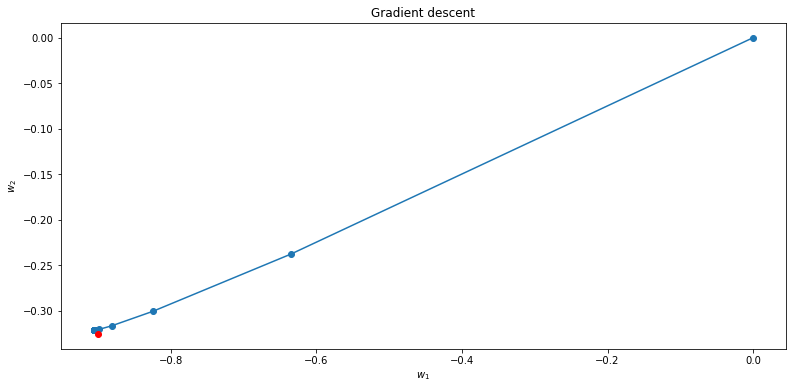

In [54]:
# Визуализируем изменение весов (красной точкой обозначены истинные веса, сгенерированные вначале)
plt.figure(figsize=(13, 6))
plt.title('Gradient descent')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(w_list[:, 0], w_list[:, 1])
plt.scatter(w_true[0, 0], w_true[0, 1], c='r')
plt.plot(w_list[:, 0], w_list[:, 1])

plt.show()

Text(0, 0.5, 'MSE')

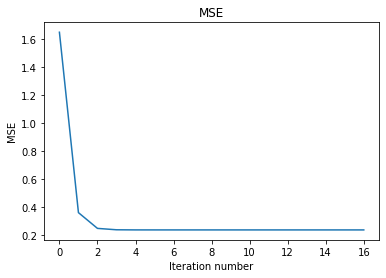

In [55]:
# Визуализируем изменение функционала ошибки
plt.plot(np.arange(len(errors)), errors)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

Text(0, 0.5, 'log(MSE)')

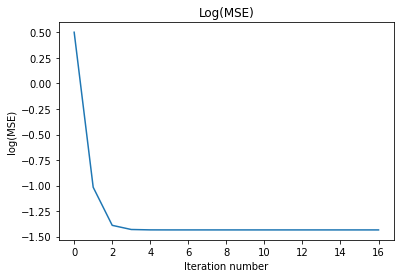

In [56]:
# Визуализируем изменение функционала ошибки
plt.plot(np.arange(len(errors)), np.log(np.array(errors)))
plt.title('Log(MSE)')
plt.xlabel('Iteration number')
plt.ylabel('log(MSE)')

In [57]:
def normal_equation(X, y):
    return np.linalg.solve((X.T).dot(X), (X.T).dot(y)).T

normal_eq_w = normal_equation(X, Y)
print('В случае использования нормального уравнения функционал ошибки составляет {0}'.format(
    round(mserror(X, normal_eq_w, Y), 4)))

В случае использования нормального уравнения функционал ошибки составляет 0.2383


In [58]:
class linear_regression:
    def __init__(self, eta = 0.9, max_iter = 1e4, min_weight_dist = 1e-8):
        self.eta = eta
        self.max_iter = max_iter
        self.min_weight_dist = min_weight_dist
    def _mserror(self, X, y_real):
        #рассчёт среднеквадратичной ошибки
        y = X.dot(self.w.T)+self.w0
        return np.sum((y - y_real)**2) / y_real.shape[0]
    def _mserror_grad(self, X, y_real):
        #рассчёт градиента ошибки.
        #2*delta.T.dot(X)/y_real.shape[0] - градиент по коэффициентам при факторах
        #np.sum(2*delta)/y_real.shape[0] - производная(градиент) при нулевом коэффициенте
        delta=(X.dot(self.w.T)+self.w0-y_real)
        return 2*delta.T.dot(X)/y_real.shape[0], np.sum(2*delta)/y_real.shape[0]
    def _optimize(self, X, Y):
        #оптимизация коэффициентов
        iter_num = 0
        weight_dist = np.inf
        self.w = np.zeros((1, X.shape[1]))
        self.w0=0
        while weight_dist > self.min_weight_dist and iter_num < self.max_iter:
            gr_w, gr_w0=self._mserror_grad(X, Y)
            if iter_num==0:
                #Чтобы eta адаптировалась к порядку градиента, делим на l2 норму градиента в нуле
                eta=self.eta/np.sqrt(np.linalg.norm(gr_w)**2+(gr_w0)**2)
            new_w = self.w - eta * gr_w
            new_w0= self.w0 - eta * gr_w0
            weight_dist = np.sqrt(np.linalg.norm(new_w - self.w)**2+(new_w0 - self.w0)**2)
            iter_num += 1
            self.w = new_w
            self.w0 = new_w0
    def fit(self, X, Y):
        if Y.ndim==1:
            Y=Y[:, np.newaxis]
        self._optimize(X, Y)
        return self
    def predict(self, X):
        return (X.dot(self.w.T)+self.w0).flatten()
    def test(self, X, Y):
        if Y.ndim==1:
            Y=Y[:, np.newaxis]
        return self._mserror(X, Y)
    

In [59]:
shift=np.random.uniform(0, 100)
Y_shift=Y+shift
lr=linear_regression(0.5)
lr.fit(X, Y_shift)
lr.test(X, Y_shift)

0.23831154902541918

In [60]:
shift, lr.w0

(25.492611073489748, 25.492184782954094)

In [61]:
lr.w, w_true

(array([[-0.90562679, -0.321362  ]]), array([[-0.89910763, -0.3257505 ]]))